# Overview

- Softmax and Sigmoid

Methods to avoid Overfitting 
- Validation - early stopping 
- Image Augmentation for CNN - avoid overfitting for CNN 
- Dropout 


Additional Topics
- Dead neuron
- Overfitting 
-- What is overfitting 

6 ways to prevent Overfitting 
- Getting more data
- Data augmentation & Noise
- Simplifying the model 
- Early Stopping / Early Termination 
- Regularization 
- Dropout 

Summary 

# Softmax and Sigmoid 

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

Notice that our last layer (our classifier) consists of a Dense layer with 2 output units and a softmax activation function, as seen below:

Another popular approach when working with binary classification problems, is to use a classifier that consists of a Dense layer with 1 output unit and a sigmoid activation function, as seen below:

In [ ]:
tf.keras.layers.Dense(1, activation='sigmoid')

Either of these two options will work well in a binary classification problem. However, you should keep in mind, that if you decide to use a sigmoid activation function in your classifier, you will also have to change the loss parameter in the model.compile() method, from 'sparse_categorical_crossentropy' to 'binary_crossentropy', as shown below:

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Validation - early stopping 

Clear sign of overfitting: Model is having a great accuracy on training set but significantly lower accuracy on the validation set. 

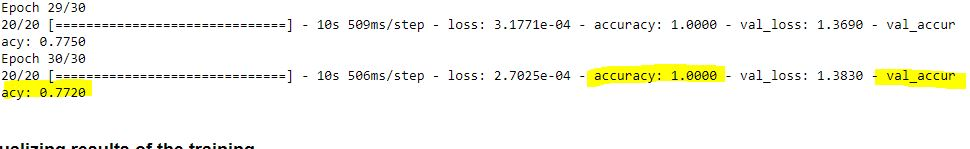

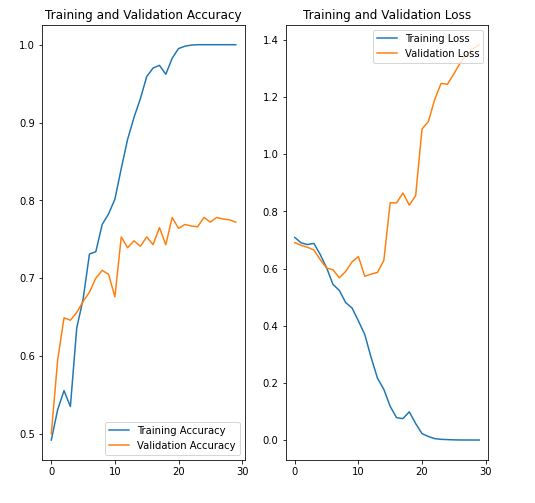

### How to avoid Over-fitting?

Short answer is use multiple models with different architecture and then compare them using the validation set. The model with the lowest validation loss is the best model. 

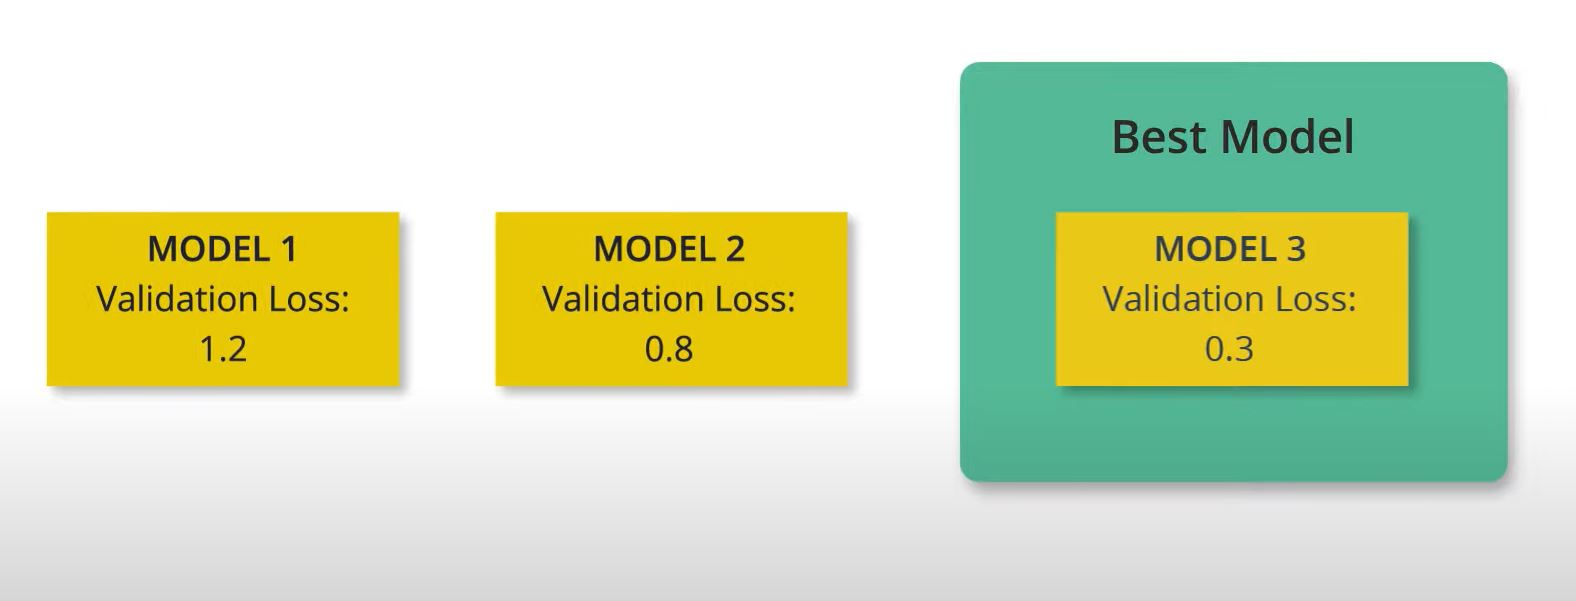

### Why use validation set when you have the Test Set

The problem is that even though we do not use the validation set to tune the weights and biases during training, we ultimately end up tuning our model such that it is performs well on the validation set and training set. 

So, our Neural network will be biased in favour oif the validation set. So, we need a seperate test to really see how well we generalize our model. 


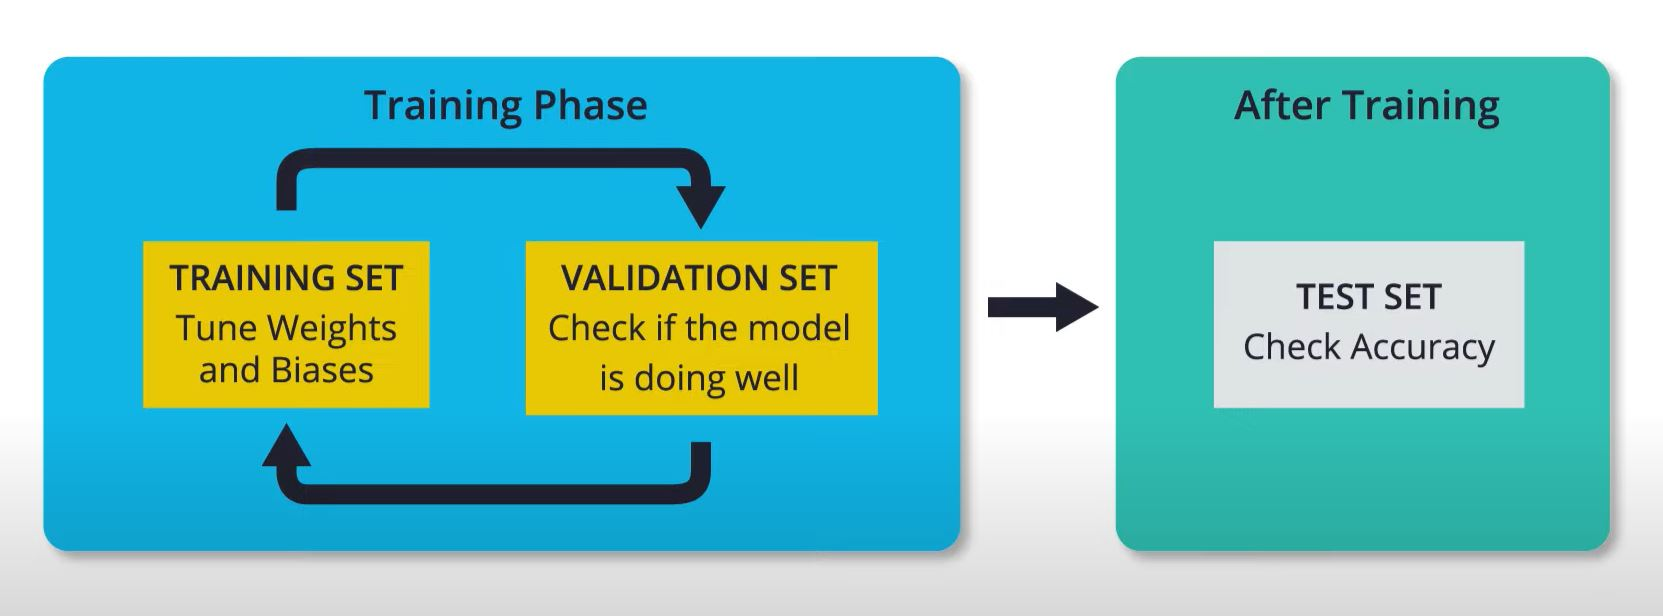

# Image Augmentation for CNN

When training a CNN to recognize a particular object in an image, you want the CNN to be able to detect this object regardless of their size and position in the image. 
- dog could be in any corner
- dog could be angled
- dog could be small or big 

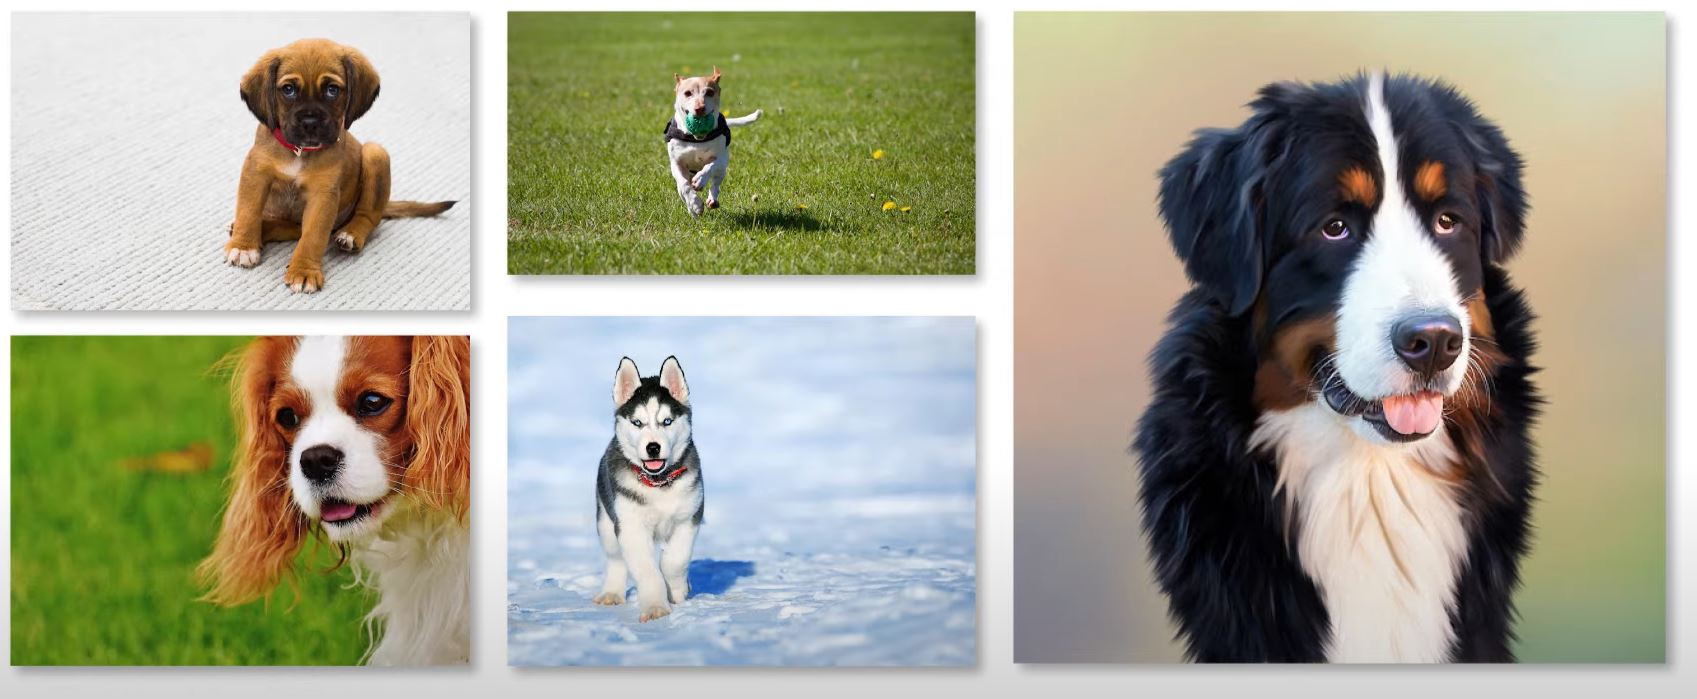

If you are lucky and have a very large training set... then it might not be a problem.

Otherwise, your CNN will overfit and might not gereralize very well. So you can use Image augmentation 

**Image Augmentation:** It works by creating new training images by applying a number of random image transformations to the training set of the images. 

Thus, CNN will work better to unseen data and generalize better.

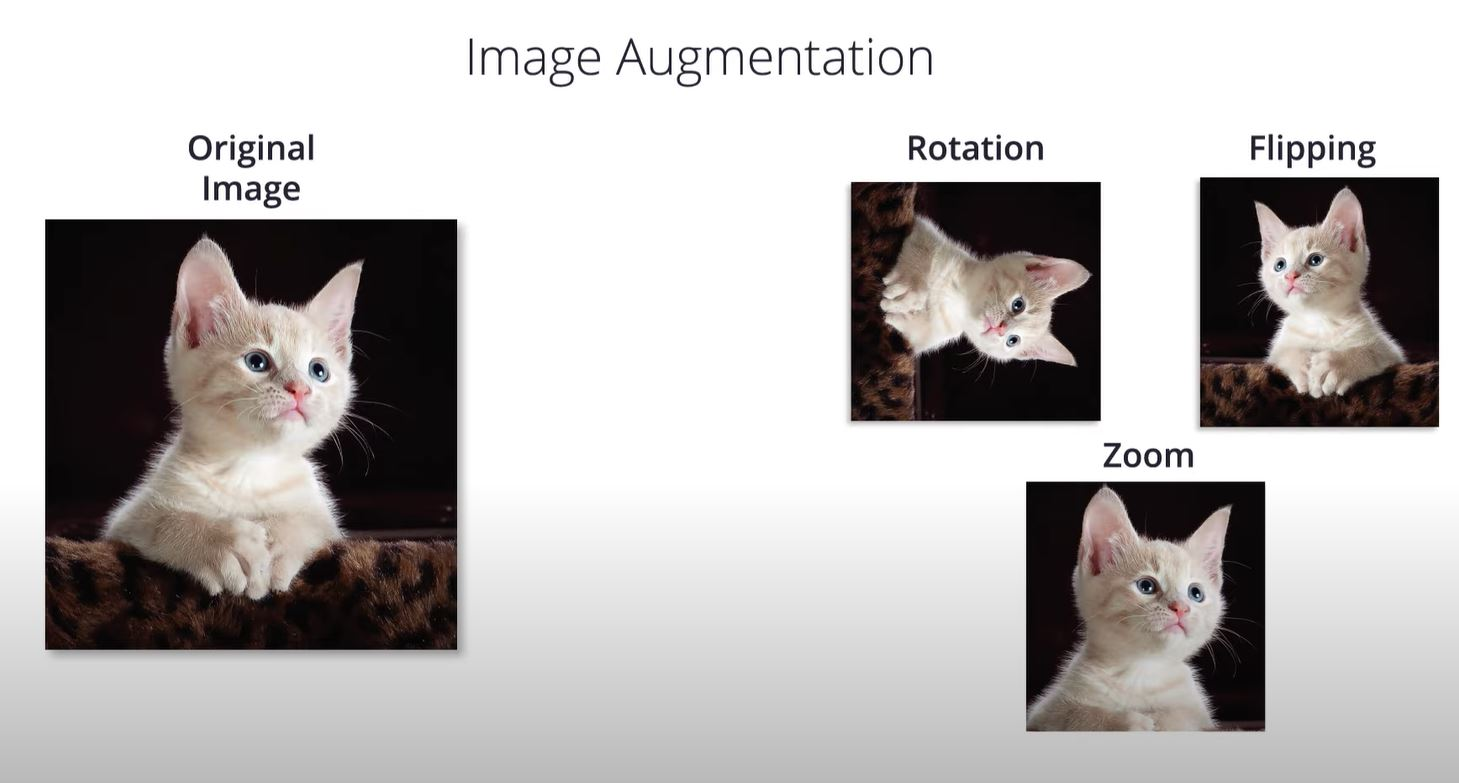

# Dropout


It is another technique that prevents overfitting. During training a neural network adjusts weights and biases to minimize the loss function. One problem that could occour is that one part of the neural network ends up with very large weights whereas the other parts of the neural networks have very small weights. 
- Larger weights-> Playing a major role in determining the result
- Smaller weights-> Playing not very significant role in determining the result 

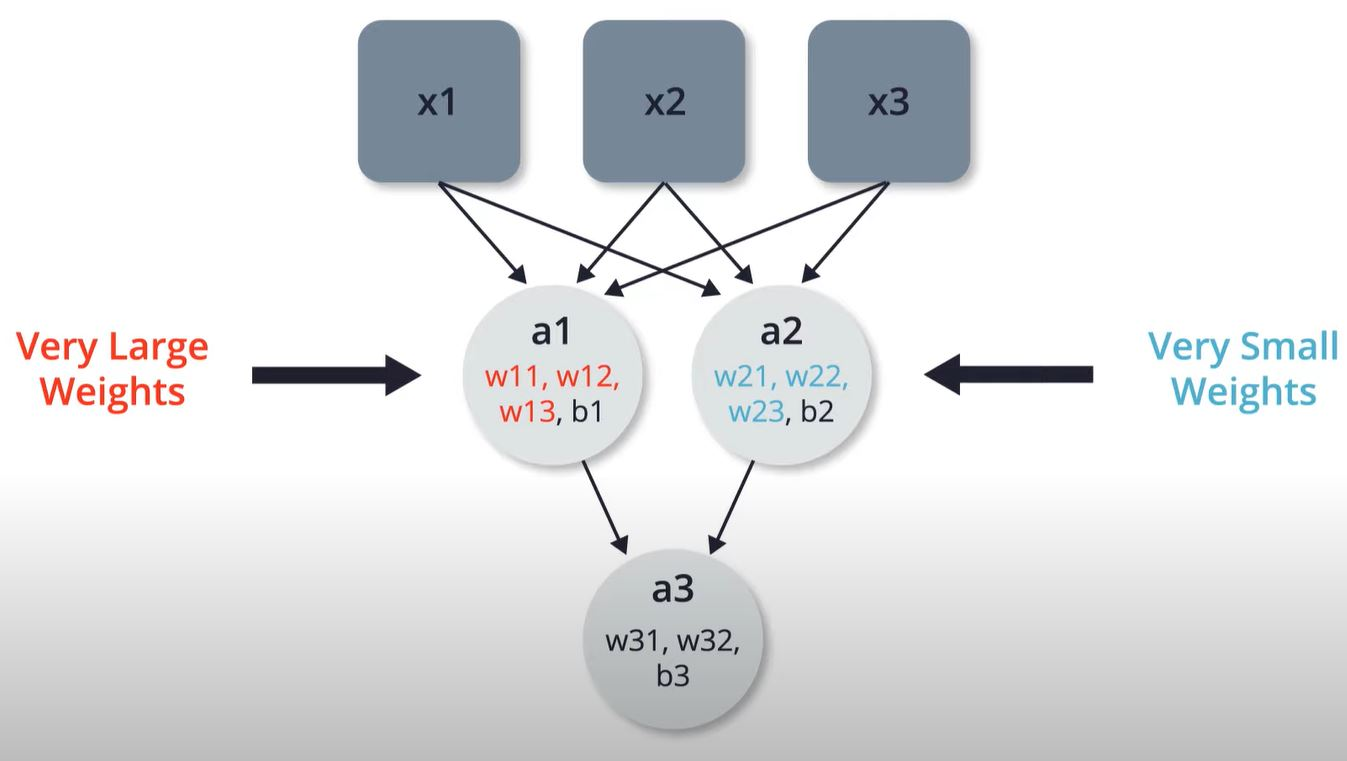

We can avoid this problem by using dropout. Here, we are randomly turning off some of the neurons during the training, so that the other neurons have to step up and they need to actively take part in the training. 

So, we do feedforward and backpropogation passes without using these neurons(black neurons) at different epochs. 
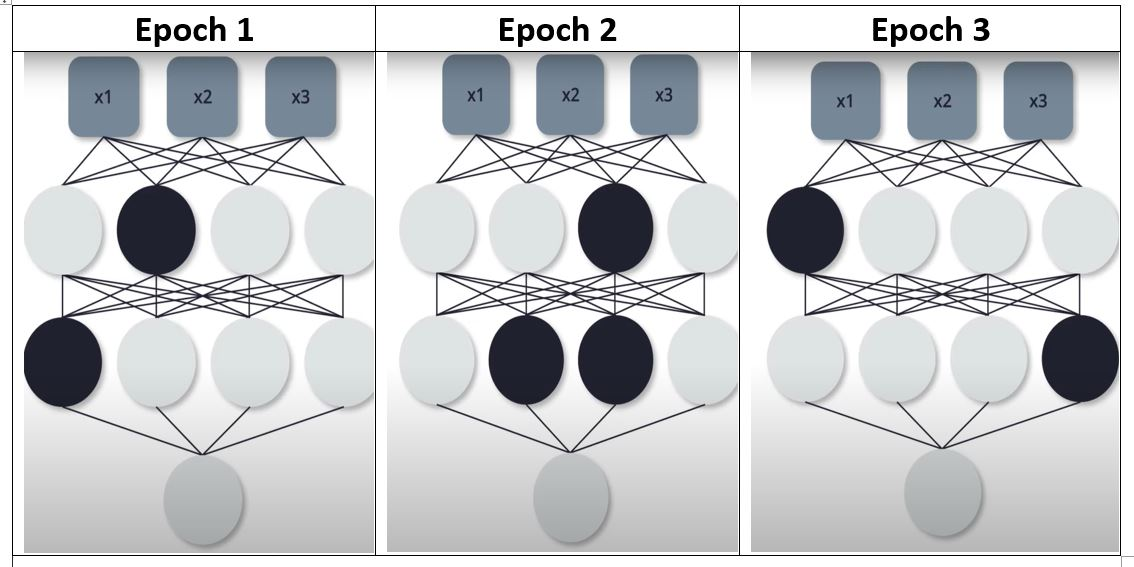

By implementing Dropout, we can avoid overfitting. The neural network becomes more resistant as it does not rely on certain neurons to solve the problem. Other neurons will have to step up and do the job.

In practice, we define the probablility that each neuron gets dropped at each epoch. So, if we train the data on many many itterations, so on average each neuron will have the same change to be turned off. 

# Dead Neuron

Regardless of the popularity, **ReLU has its drawback called “Dead neuron”.** It is mainly caused by **a large negative gradient that flows through the network resulting in a big negative weight for ReLU neurons. This neuron will always produce zero during feedforward and backward propagation, therefore the weight of this neuron will never be updated again and considered forever dead.** It can be tough of as a natural Dropout, but if this happens to every neuron in a specific layer, it cuts the gradient to the previous layer resulting in zero gradients to the layers behind it. **As an alternative, we can use Leaky ReLU which has at least 0.01 derivative when the output during feedforward is zero.**

Ref -> https://towardsdatascience.com/neural-network-the-dead-neuron-eaa92e575748

# Overfitting 

Ref-> https://hackernoon.com/memorizing-is-not-learning-6-tricks-to-prevent-overfitting-in-machine-learning-820b091dc42

### What is Overfitting?
The word overfitting refers to a model that models the training data too well. Instead of learning the genral distribution of the data, the model learns the expected output for every data point. This is the same as **memorizing the answers** to a maths quizz instead of **knowing the formulas.**

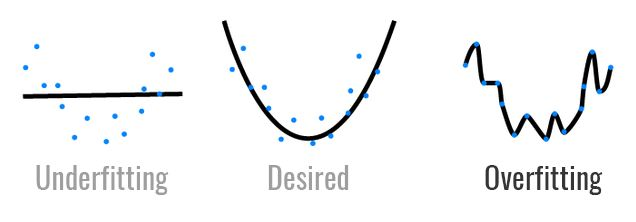

### How to detect overfitting? 

Low Training Error and High Test error => Overfitting 

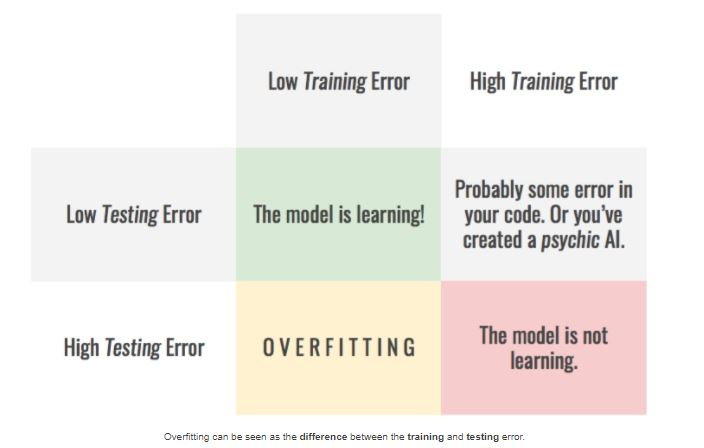

**Note:** Usually if you do random sampling and have a decent model then you will never have the problem of High Training error. So, for this technique to work, you need to make sure all parts are equally representative of your data. A good practice is to **shuffle the order of the dataset before splitting** or **use stratified sampling.**

### How to prevent overfitting - Model and Data

#### 1. Gather more Data 
You model can only store so much information. This means that the more training data you feed it, the less likely it is to overfit. The reason is that, as you add more data, the model becomes unable to overfit all the samples, and is forced to generalize to make progress.

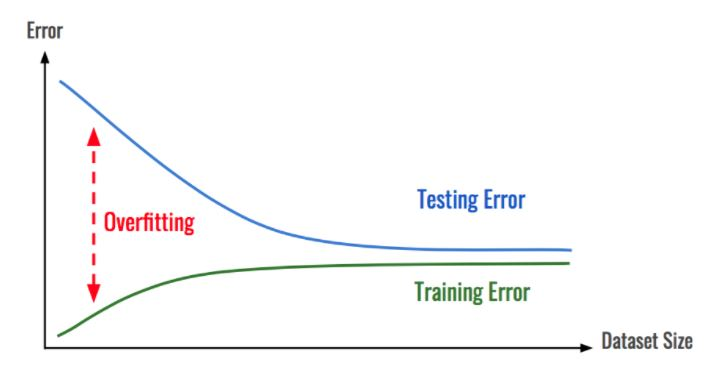

#### 2. Data augmentation & Noise

Collecting more data is a tedious and expensive process. If you can’t do it, you should try to make your data appear as if it was more diverse. To do that, use data augmentation techniques so that each time a sample is processed by the model, it’s slightly different from the previous time. This will make it harder for the model to learn parameters for each sample.

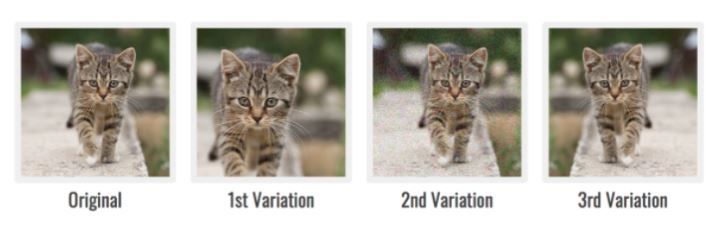

Another good practice is to add noise:
- **To the input:** This serves the same purpose as data augmentation, but will also work toward making the model robust to natural perturbations it could encounter in the wild.
- **To the output:** Again, this will make the training more diversified.
**Note:** In both cases, you need to make sure that the magnitude of the noise is not too great, making the output incorrect. 

#### 3. Simplifying the Model 

If, even with all the data you now have, your model still manages to overfit your training dataset, it may be that the model is too powerful. You could then try to **reduce the complexity** of the model.

As stated previously, a model can only overfit that much data. By progressively reducing its complexity — # of estimators in a random forest, # of parameters in a neural network etc. — you can make the model simple enough that it doesn’t overfit, but complex enough to learn from your data. To do that, it’s convenient to look at the error on both datasets depending on the model complexity.

This also has the advantage of making the model lighter, train faster and run faster.

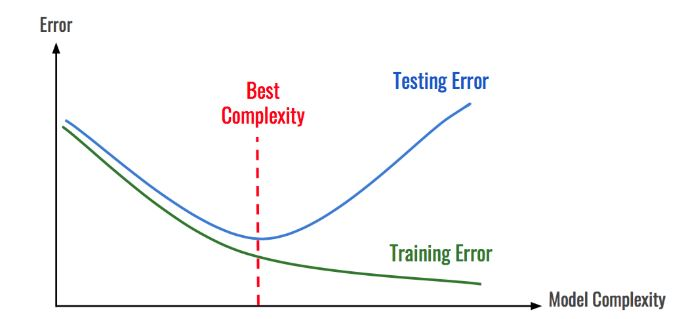

How to prevent overfitting - Training Process
A second possibility it to change the way the training is done. This includes **altering the loss function,** or **the way the model functions during training.**

#### 4. Early Stopping / Early Termination 

In most cases, the model starts by learning a correct distribution of the data, and, at some point, starts to overfit the data. By identifying the moment where this shift occurs, you can stop the learning process before the overfitting happens. As before, this is done by looking at the training error over time.

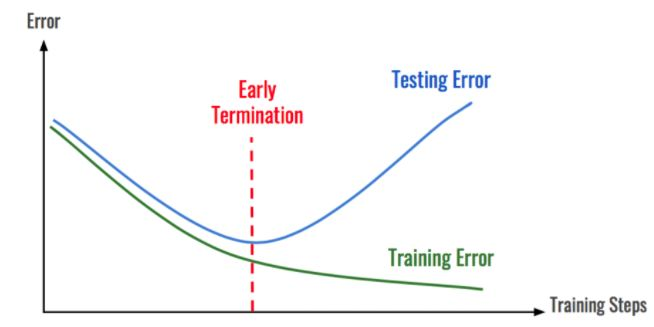

#### 5. Regularization 

Regularization is a process of constraining the learning of the model to reduce overfitting. It can take many different forms, and we will see a couple of them.

**L1 and L2 regularization**
One of the most powerful and well-known technique of regularization is to add a penalty to the loss function. The most common are called L1 and L2:

The L1 penalty aims to minimize the absolute value of the weights
The L2 penalty aims to minimize the squared magnitude of the weights.

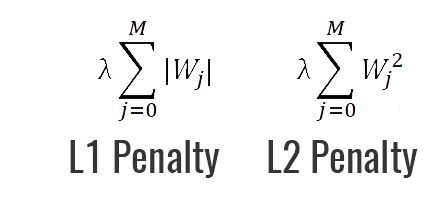

With the penalty, the model is forced to make compromises on its weights, as it can **no longer make them arbitrarily large.** This makes the model **more general,** which helps combat overfitting.

The L1 penalty has the added advantage that it enforces feature selection, which means that it has a tendency to set to 0 the less useful parameters. This helps identify the most relevant features in a dataset. The downside is that it is often not as computationally efficient as the L2 penalty.

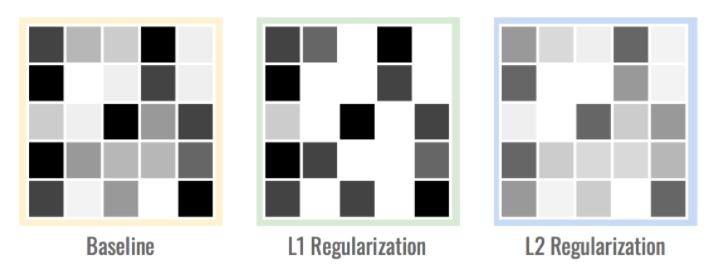

Here is what the weight matrixes would look like. Note how the L1 matrix is sparse with many zeros, and the L2 matrix has slightly smaller weights.

Another possibility is to add noise to the parameters during the training, which helps generalization.

#### 6. Dropout

This extremely effective technique is specific to Deep Learning, as it relies on the fact that neural networks process the information from one layer to the next. The idea is to randomly deactivate either neurons (dropout) or connections (dropconnect) during the training.

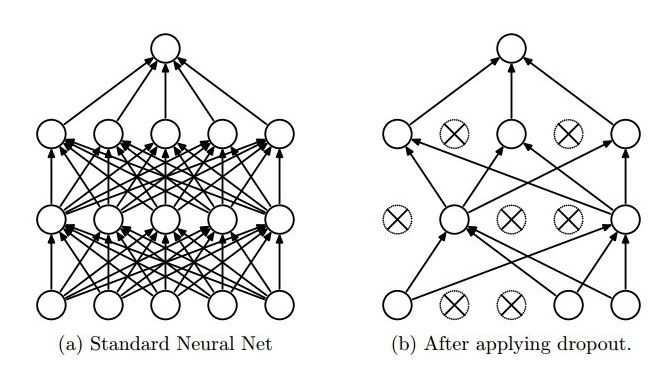

This forces the network to become redundant, as it can no longer rely on specific neurons or connections to extract specific features. Once the training is done, all neurons and connections are restored. It has been shown that this technique is somewhat equivalent to having an ensemble approach, which favorises generalization, thus reducing overfitting.

# summary 

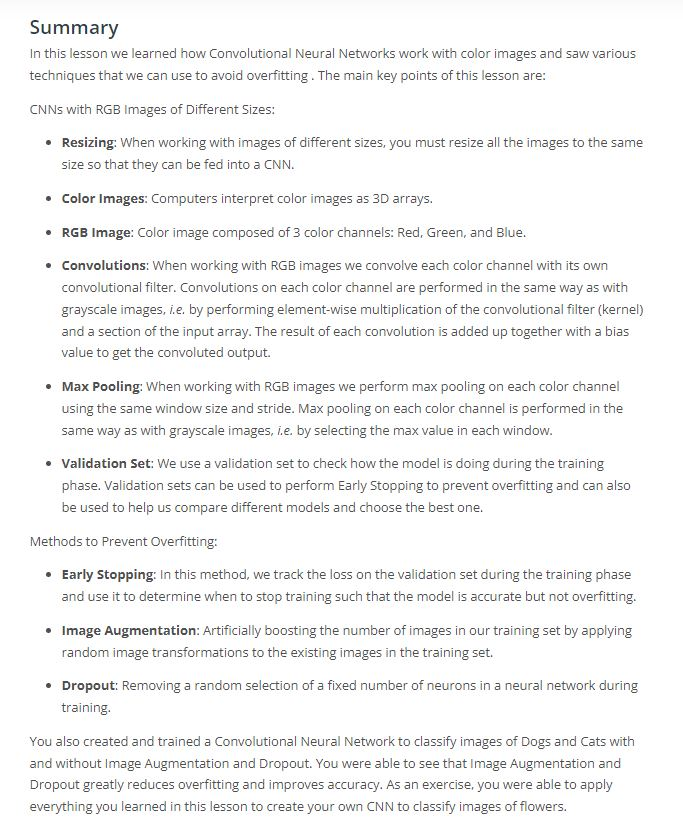